In [12]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
funnel = pd.read_excel('AssignmentData.xlsx', sheet_name='Funnel')

# Handle missing values
# Assuming missing values in quantitative columns can be replaced with zero
funnel.fillna(0, inplace=True)
# Convert 'Date' column to datetime type
funnel['Date'] = pd.to_datetime(funnel['Date'])

# Convert 'Timestamp' column to datetime type
funnel['Timestamp'] = pd.to_datetime(funnel['Timestamp'])

# Now you can proceed with the grouping
monthly_summary = funnel.groupby(['Segment', 'City', pd.Grouper(freq='M', key='Date'), 'KPI']).sum()



# Descriptive analysis
# monthly_summary = funnel.groupby(['Segment', 'City', pd.Grouper(freq='M'), 'KPI']).sum()
quarterly_summary = funnel.groupby(['Segment', 'City', pd.Grouper(freq='Q'), 'KPI']).sum()
print(funnel.columns)
funnel['YourCorrectColumnName'] = pd.to_datetime(funnel['YourCorrectColumnName'])

# Boxplot for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='KPI', y='Value', data=funnel)
plt.title('Boxplot for Outliers in Funnel Analysis')
plt.show()

# Time-series visualization
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='Value', hue='KPI', data=funnel)
plt.title('Time-series Visualization for Funnel Analysis')
plt.show()


KeyError: 'Date'

ValueError: List of boxplot statistics and `positions` values must have same the length

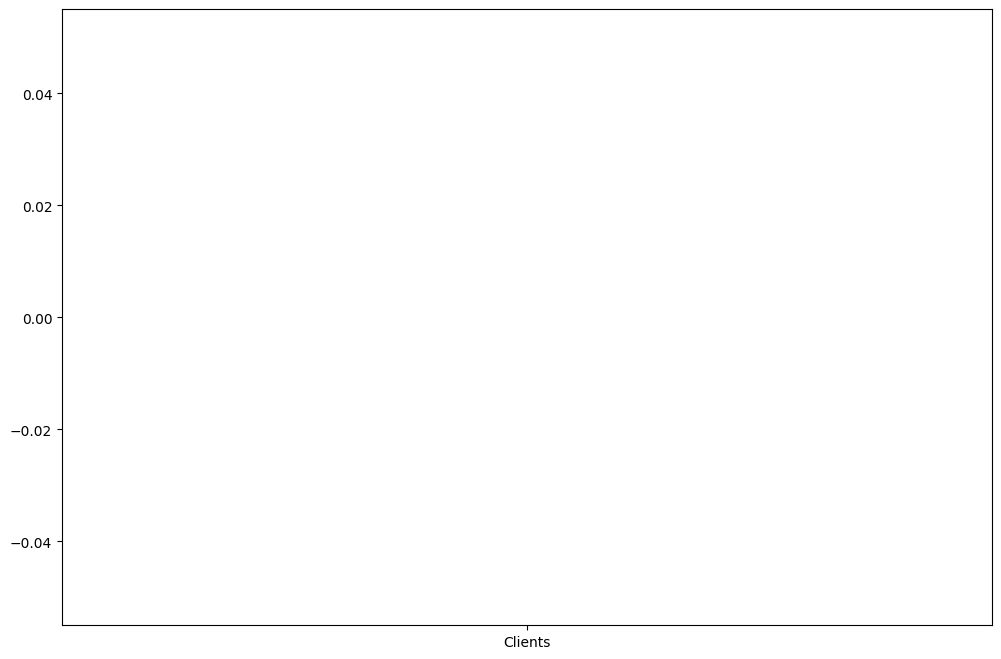

In [3]:
# Create Conversion rate column
funnel['Conversion_rate'] = funnel[funnel['KPI'] == 'Lv5_Visitors']['Value'] / funnel[funnel['KPI'] == 'Lv1_Visitors']['Value']

# Visualization for spread of conversion rates
plt.figure(figsize=(12, 8))
sns.boxplot(x='Segment', y='Conversion_rate', data=funnel)
plt.title('Spread of Conversion Rates Across Segments')
plt.show()

# Identify region with best year-on-year growth
# Assume 'Region' column exists in the dataframe
growth_by_region = funnel.groupby(['Region', pd.Grouper(freq='Y')])['Conversion_rate'].mean()
best_region = growth_by_region.idxmax()

# Time-series modeling
# You can use ARIMA or any time-series forecasting method
# Example: ARIMA using statsmodels
from statsmodels.tsa.arima.model import ARIMA
# Your code for time-series modeling here


In [9]:
# Load A/B test data
abtest = pd.read_excel('AssignmentData.xlsx', sheet_name='AB_Test')

# Time-series visualization for each device type
plt.figure(figsize=(15, 8))
sns.lineplot(x='Date', y='Total_Clicks', hue='Device_Type', data=abtest)
plt.title('Time-series Visualization for A/B Testing')
plt.show()

# Identify best-performing device
best_device = abtest.groupby('Device_Type')['Total_Clicks'].sum().idxmax()

# Best day/period where performance is better on average
# You can analyze daily or weekly trends
best_period = abtest.groupby(['Date', 'Device_Type'])['Total_Clicks'].mean().idxmax()


ValueError: Could not interpret value `Total_Clicks` for `y`. An entry with this name does not appear in `data`.

<Figure size 1500x800 with 0 Axes>

In [13]:
# Assume you have a function for calculating sample size
# Use a function for hypothesis testing
# Example: Using t-test for simplicity
from scipy.stats import ttest_ind

def ab_test_hypothesis(data):
    control_group = data[data['Group'] == 'Control']['Metric']
    experiment_group = data[data['Group'] == 'Experiment']['Metric']
    t_stat, p_value = ttest_ind(control_group, experiment_group)
    
    if p_value < 0.05:
        if t_stat > 0:
            return "Experiment Group is Better"
        else:
            return "Control Group is Better"
    else:
        return "Indeterminate"

# Check hypothesis
result = ab_test_hypothesis(abtest)
print(result)


KeyError: 'Metric'